In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!ls -al /kaggle/input/landmark-recognition-2020

total 36504
drwxr-xr-x  4 nobody nogroup        0 Dec  3 15:52 .
drwxr-xr-x  3 root   root        4096 Dec 29 05:48 ..
-rw-r--r--  1 nobody nogroup   300019 Dec  3 15:52 sample_submission.csv
drwxr-xr-x 18 nobody nogroup        0 Dec  3 15:52 test
drwxr-xr-x 18 nobody nogroup        0 Dec  3 16:08 train
-rw-r--r--  1 nobody nogroup 37071516 Dec  3 15:52 train.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/kaggle/input/landmark-recognition-2020/train.csv")
df.head()

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


In [5]:
print(len(df))
df = df[df['landmark_id'].map(df['landmark_id'].value_counts())==99]
print(len(df))
category_count = len(df.landmark_id.unique())
print(category_count)

1580470
3861
39


In [6]:
df.landmark_id = df.landmark_id.astype('category')
df['class_id'] = df.landmark_id.cat.codes

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,id,landmark_id,class_id
0,28a60ca798e402d1,41769,7
1,fb83316ebb28cbda,48891,9
2,91ee700513841bb9,63473,14
3,28c88b0dcb84b3d6,97854,22
4,67645da5a4e7e5ea,109703,24


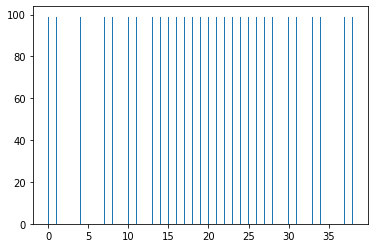

In [8]:
plt.hist(df.class_id, bins=1000)
plt.show()

In [9]:
image_ids = df.id.to_numpy()
print(image_ids.shape)
print(image_ids[:3])

class_id = df.class_id.to_numpy()
print(class_id.shape)
print(class_id[:3])

(3861,)
['28a60ca798e402d1' 'fb83316ebb28cbda' '91ee700513841bb9']
(3861,)
[ 7  9 14]


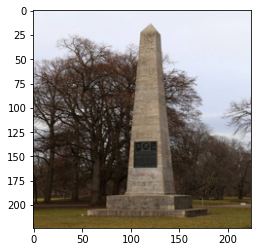

In [10]:
from PIL import Image

def load_image(image_id):
    full_path = "/kaggle/input/landmark-recognition-2020/{}/{}/{}/{}/{}.jpg".format(
        "train", image_id[0], image_id[1], image_id[2], image_id)

    img = Image.open(full_path)
    image = img.resize((224, 224))
    return np.array(image)

image = load_image("17660ef415d37059")
plt.imshow(image)
plt.show()

In [11]:
x = []
y = []
print("total {} images.".format(len(image_ids)))
for i, image_id in enumerate(image_ids):
    if i%100==99:
        print("{} images loaded".format(i+1))
    x.append(load_image(image_id))
    y.append(class_id[i])

total 3861 images.
100 images loaded
200 images loaded
300 images loaded
400 images loaded
500 images loaded
600 images loaded
700 images loaded
800 images loaded
900 images loaded
1000 images loaded
1100 images loaded
1200 images loaded
1300 images loaded
1400 images loaded
1500 images loaded
1600 images loaded
1700 images loaded
1800 images loaded
1900 images loaded
2000 images loaded
2100 images loaded
2200 images loaded
2300 images loaded
2400 images loaded
2500 images loaded
2600 images loaded
2700 images loaded
2800 images loaded
2900 images loaded
3000 images loaded
3100 images loaded
3200 images loaded
3300 images loaded
3400 images loaded
3500 images loaded
3600 images loaded
3700 images loaded
3800 images loaded


In [12]:
x = np.array(x)
y = np.array(y)

In [13]:
i = int(len(x)*0.8)

train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

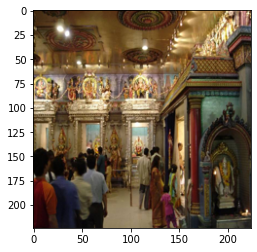

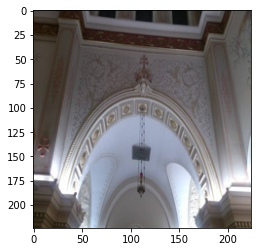

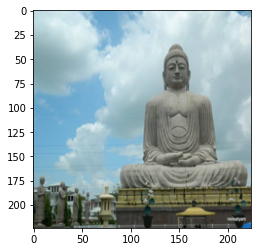

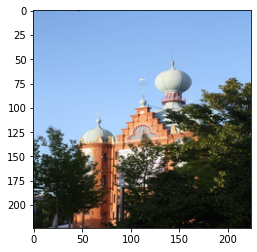

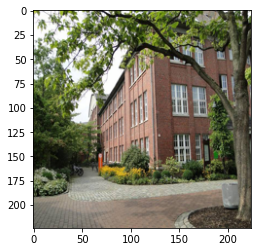

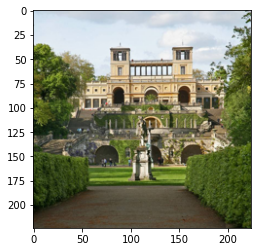

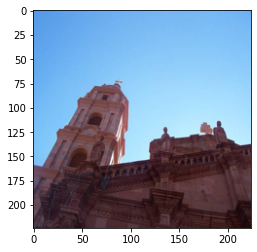

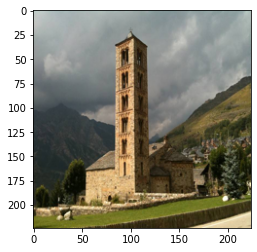

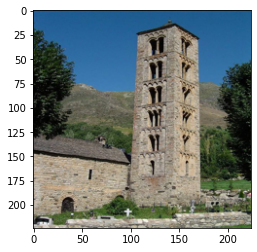

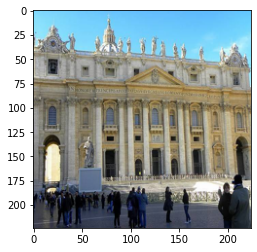

In [14]:
for i in range(10):
    plt.imshow(train_x[i])
    plt.show()

2021-12-29 05:50:15.556886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-29 05:50:15.648925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-29 05:50:15.649662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-29 05:50:15.650761: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 7, 7, 1408)        7768569   
_________________________________________________________________
flatten (Flatten)            (None, 68992)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               17662208  
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 39)                10023     
Total params: 25,441,824
Trainable params: 17,672,743
Non-trainable params: 7,769,081
_________________________________________________________________


2021-12-29 05:50:22.209613: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-29 05:50:30.888998: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


49/49 [==============================] - 48s 711ms/step - loss: 1.2838 - acc: 0.6852 - val_loss: 0.9632 - val_acc: 0.7943


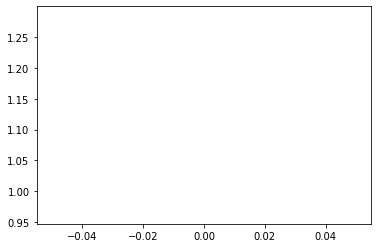

13/13 [==============================] - 1s 103ms/step - loss: 0.9632 - acc: 0.7943
loss= 0.9631814360618591
acc= 0.7943078875541687


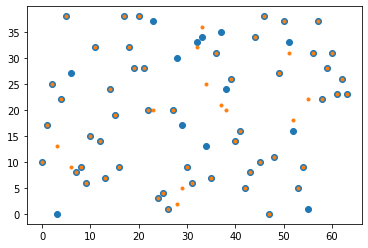

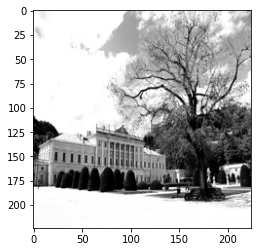

label category index = 10
predicted category index = 10


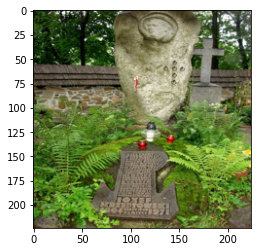

label category index = 17
predicted category index = 17


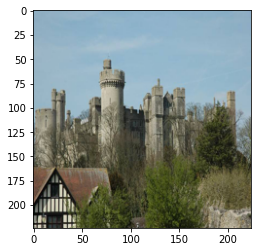

label category index = 25
predicted category index = 25


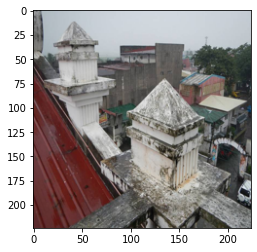

label category index = 0
predicted category index = 13


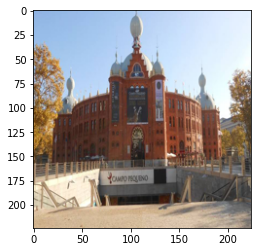

label category index = 22
predicted category index = 22


In [15]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(category_count, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow(train_x, train_y, batch_size=BATCH_SIZE)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow(test_x, test_y, batch_size=BATCH_SIZE)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=1
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()

for i in range(5):
    plt.imshow(test_x[i].astype(np.int16))
    plt.show()
    print("label category index =", test_y[i])
    print("predicted category index =", predicted[i])